# ⚯ Pair Programming 3.1 - Hypothesis Testing

In this exercise, you will have the opportunity to decide to pick the variables that you want to perform one and two sample t-tests.

## Objectives

You will be able to:

* Construct and interpret a confidence interval for a single mean
* Perform a hypothesis test for a single mean
* Construct and interpret a confidence interval for two independent means
* Perform a hypothesis test for two independent means


## The Data: Last Words of Death Row Inmates

On Kaggle there is a famous data set of *[Last Words of Death Row Inmates](https://www.kaggle.com/datasets/mykhe1097/last-words-of-death-row-inmates)*. While this data set is often used for natural language processing, we'll use the non-text data for statistical inference on one and two means using the t-distribution.

### Data Dictionary

The dataset consists of 545 observations with 21 variables. They are:

* `Execution`: The order of execution, numeric.
* `LastName`: Last name of the offender, character.
* `FirstName`: First name of the offender, character.
* `TDCJNumber`: TDCJ Number of the offender, numeric.
* `Age`: Age of the offender, numeric.
* `Race`: Race of the offender, categorical : Black, Hispanic, White, Other.
* `CountyOfConviction`: County of conviction, character.
* `AgeWhenReceived`: Age of offender when received, numeric.
* `EducationLevel`: Education level of offender, numeric.
* `NativeCounty`: Native county of offender, categorical : 0 = Within Texas, 1= Outside Texas.
* `PreviousCrime`: Whether the offender committed any crime before, categorical: 0= No, 1= Yes.
* `Codefendants`: Number of co-defendants, numeric.
* `NumberVictim`: Number of victims, numeric.
* `WhiteVictim`, `HispanicVictim`, `BlackVictim`, `VictimOtherRace` `FemaleVictim`, `MaleVictim`: Number of victims with specified demographic features, numeric.
* `LastStatement`: Last statement of offender, character.

The [data file](https://github.com/learn-co-curriculum/dsc-hypothesis-testing-ent/blob/main/data/texas.csv) that we'll be using has the first 20 variables, i.e. we're excluding the `LastStatement` variable.

*N.B.*: Note this data is from 1982 - 2017 and for that time period the data is exhaustive.

## Preliminary Steps

As usual, begin with importing the Python libraries that you will need. Then bring in the data and explore it.

You'll likely want to use `scipy.stats`. If you want to use `confidence_interval(confidence_level=0.95)` with [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), then you need to have `scipy` version 1.11.0.

In [1]:
# Pip install version 1.11.0 of scipy (if necessary)

# Code here

In [3]:
# Bring in germane libraries; you may need to require scipy 11.1.0
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv("texas.csv")


Now that you have brought in the data. Consider these or similar commands to get a feel for the data.
* `.info()`
* `.head()`



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   LastName            383 non-null    object
 1   FirstName           383 non-null    object
 2   TDCJNumber          383 non-null    int64 
 3   Age                 383 non-null    int64 
 4   Race                383 non-null    object
 5   CountyOfConviction  383 non-null    object
 6   AgeWhenReceived     383 non-null    int64 
 7   EducationLevel      383 non-null    int64 
 8   NativeCounty        383 non-null    int64 
 9   PreviousCrime       383 non-null    int64 
 10  Codefendants        383 non-null    int64 
 11  NumberVictim        383 non-null    int64 
 12  WhiteVictim         383 non-null    int64 
 13  HispanicVictim      383 non-null    int64 
 14  BlackVictim         383 non-null    int64 
 15  VictimOther.Races   383 non-null    int64 
 16  FemaleVictim        383 no

In [6]:
data.head()

,LastName,FirstName,TDCJNumber,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther.Races,FemaleVictim,MaleVictim
0,Cardenas,Ruben,999275,47,Hispanic,Hidalgo,28,11,1,0,0,1,0,1,0,0,1,0
1,Pruett,Robert,999411,38,White,Bee,22,8,0,1,0,1,1,0,0,0,0,1
2,Preyor,Taichin,999494,46,Black,Bexar,34,10,0,0,0,1,1,0,0,0,0,1
3,Bigby,James,997,61,White,Tarrant,36,9,0,1,0,1,1,0,0,0,0,1
4,Ruiz,Rolando,999145,44,Hispanic,Bexar,22,10,0,1,4,1,0,1,0,0,1,0


### Preprocessing

While there are a number of preprocessing steps you may choose to make, at the very least you should do the following.

Based on the data dictionary and how the data is interpreted by Numpy, convert any non-numeric data into the proper form. Verify that your code worked correctly.

In [ ]:
# Your code here; you may want to use multiple code chunks

### EDA

Now perform Exploratory Data Analysis of at least three variables of your choosing. You should look at both descriptive statistics and visualizations.

In [7]:
data['Age'].describe()

count    383.000000
mean      39.373368
std        8.653542
min       24.000000
25%       33.000000
50%       38.000000
75%       44.000000
max       67.000000
Name: Age, dtype: float64

In [ ]:
data['EducationLevel'].describe()

In [9]:
data['NumberVictim'].describe()

count    383.000000
mean       1.394256
std        0.761418
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: NumberVictim, dtype: float64

In [ ]:
fig, ax = plt.subplots(3)
ax[0].hist(data['Age'], bins = 'auto')
ax[0].set_title("Age")
ax[1].hist(data['EducationLevel'], bins = 'auto')
ax[1].set_title("EducationLevel")
ax[2].hist(data['NumberVictim'])
ax[2].set_title("NumberVictim")
plt.show()

## Statistical Inference

### One mean

Now pick a variable that you can perform statistical inference on a single sample mean using the t-distribution.

In the code block below please respond to all of the following (commented out):

*   What is the variable you chose?
*   How do you know it is appropriate for statistical inference on a single mean using the t-distribution?
*   You'll be asked to contruct and interpret a confidence interval. What is the level of confidence that you'll pick?
*   You'll be asked to perform a hypothesis test.
  *   What are the null and alternative hypotheses?
  *   What is the level of significance?



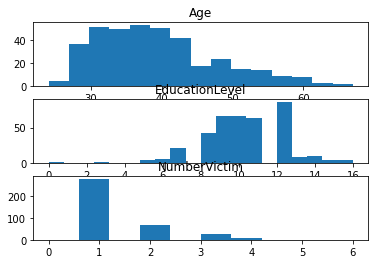

In [13]:
# Type your responses to the bullet points here
# The variable we chose is EducationLevel. 
# Level of confidence: 0.95, or 5%, which is a standard range to choose 
# Null: The sample mean for education level is the same as the population mean for education level 
# Alternate: The sample mean for education level is different from the population mean for education level


#### Confidence Interval

Now construct a confidence interval for your chosen variable at the level of confidence you chose above.

In [28]:
# sample = np.random.choice(data['EducationLevel'], 25)
# mu = data['EducationLevel'].mean()
# x_bar = np.mean(sample)
# sigma = np.std(sample)
# df = len(sample)-1
# n = 25
# t_crit = stats.t.ppf(0.95, df)
# conf = (x_bar-t_crit*sigma/np.sqrt(n),x_bar+t_crit*sigma/np.sqrt(n) )
# conf

sample = np.random.choice(data['EducationLevel'], size = 25)
n = 25
mu = data['EducationLevel'].mean()
x_bar = np.mean(sample)
sample_std = np.std(sample)
df = len(sample) - 1
result = stats.ttest_1samp(sample, mu)
t_stat, p_value = result
t_critical = stats.t.ppf(0.975, df)
conf_interval = (x_bar - (t_critical * (sample_std/np.sqrt(n))), x_bar + (t_critical * (sample_std/np.sqrt(n))))
conf_interval

(9.270793170038191, 10.569206829961809)

Interpret the confidence interval in the code block below (commented out).

In [ ]:
# Interpret the confidence interval
# We are 95% confident that our actual mean Educational Left is contained within our confidence interval.

#### Hypothesis Test

Now perform a hypothesis test for your chosen variable at the level of significance you chose above.

In [30]:
result = stats.ttest_1samp(sample, mu)
t_stat, p_value = result
print("P_value: ", p_value)
print("T_crit: ", t_critical)
print("T-stat: ", t_stat)


P_value:  0.4211310644562801
T_crit:  2.0638985616280205
T-stat:  -0.8184887959665258


Draw the appropriate conclusion for the hypothesis test and justify your answer in the code block below (commented out).

In [31]:
# Draw the conclusion from the hypothesis test
# Draw the conclusion from the hypothesis test
# Since the p-value is greater than the alpha (0.13 > 0.05) and the t_statistic is less than the t_critical (1.569 < 2.06), 
#we fail to reject the null hypothesis, and the sample and population education levels are the same.

### Two means

Now pick a variable that you can perform statistical inference on two (independent) sample means using the t-distribution.

In the code block below please respond to all of the following (commented out):

*   What are the variables you chose?
*   How do you know it is appropriate for statistical inference on two (independent)means using the t-distribution?
*   You'll be asked to contruct and interpret a confidence interval. What is the level of confidence that you'll pick?
*   You'll be asked to perform a hypothesis test.
  *   What are the null and alternative hypotheses?
  *   What is the level of significance?

In [ ]:
# Type your responses to the bullet points here
# Variable we are choosing is education level 
# Level of confidence is 0.95 (alpha = 0.05)
# Null: the average education level between people who have committed a crime vs. not committed a crime before is the same. 
# Alternate: the average education level between people who have committed a crime vs. not committed a crime before is different.

In [46]:
pc = data[data['PreviousCrime'] == 1]
npc = data[data['PreviousCrime'] == 0]


#### Confidence Interval

Now construct a confidence interval for your chosen variables at the level of confidence you chose above.

In [50]:
# Type your code for the confidence interval here.
n_pc = pc.shape[0]
n_npc = npc.shape[0]
x_bar_pc = pc['EducationLevel'].mean()
x_bar_npc = npc['EducationLevel'].mean()
sample_std_pc = pc['EducationLevel'].std()
sample_std_npc = npc['EducationLevel'].std()
df_pc = n_pc - 1
df_npc = n_npc - 1
result = stats.ttest_ind_from_stats(mean1=x_bar_pc, std1=sample_std_pc, nobs1=n_pc,
                          mean2=x_bar_npc, std2=sample_std_npc, nobs2=n_npc,
        equal_var=False)
t_stat, p_value = result
t_critical_pc = stats.t.ppf(0.975, df_pc)
t_critical_npc = stats.t.ppf(0.975, df_npc)
conf_interval_pc = (x_bar_pc - (t_critical_pc * (sample_std_pc/np.sqrt(n_pc))), x_bar_pc + (t_critical_pc * (sample_std_pc/np.sqrt(n_pc))))
conf_interval_npc = (x_bar_npc - (t_critical_npc * (sample_std_npc/np.sqrt(n_npc))), x_bar_npc + (t_critical_npc * (sample_std_npc/np.sqrt(n_npc))))
print("conf_interval_pc: ", conf_interval_pc)
print("conf_interval_npc: ", conf_interval_npc)

conf_interval_pc:  (9.480946086685858, 10.044827109190432)
conf_interval_npc:  (10.316871699370806, 10.910641528142422)


Interpret the confidence interval in the code block below (commented out).

In [49]:
# # Interpret the confidence interval
# We are 95% confident that our mean sample education level for people who have committed a crime 
#vs. not committed a crime before is contained within the respective confidence intervals.

(10.316871699370806, 10.910641528142422)

#### Hypothesis Test

Now perform a hypothesis test for your chosen variable at the level of significance you chose above.

In [51]:
print("P_value: ", p_value)
print("T_crit: ", t_critical)
print("T-stat: ", t_stat)


P_value:  5.072594876451637e-05
T_crit:  2.0638985616280205
T-stat:  -4.099247914630965


Draw the appropriate conclusion for the hypothesis test and justify your answer in the code block below (commented out).

In [52]:
# Draw the conclusion from the hypothesis test
# since the p_vale is less than 0.05 and the t-stat is greater than the t_crit, 
# we reject the null hypothesis amd say that education levels are different whether there was a previuos crime

## Summary

Using a multivariate data set, you were able to pick variables to perform one and two sample t confidence intervals and t-tests.